In [1]:
words = open('names.txt', 'r').read().splitlines()

In [6]:
len(words)

32033

In [7]:
min(len(w) for w in words)

2

In [8]:
max(len(w) for w in words)

15

In [ ]:
b = {}
for w in words:
    new_w = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(new_w, new_w[1:]):
        b[(ch1, ch2)] = b.get((ch1, ch2), 0) + 1

sorted(b.items(), key = lambda kv: -kv[1])


In [23]:
import torch

In [39]:
N = torch.zeros(27, 27)

In [40]:
N.shape

torch.Size([27, 27])

In [42]:
sorted_letters = sorted(set(''.join(words)))
itos = {}
stoi = {}
for index, ch in enumerate(sorted_letters):
    itos[index + 1] = ch
    stoi[ch] = index + 1
itos[0] = '.'
stoi['.'] = 0

In [ ]:
for tup, count in b.items():
    ch1, ch2 = tup[0], tup[1]
    id1 = stoi[ch1]
    id2 = stoi[ch2]
    N[id1, id2] = count

N

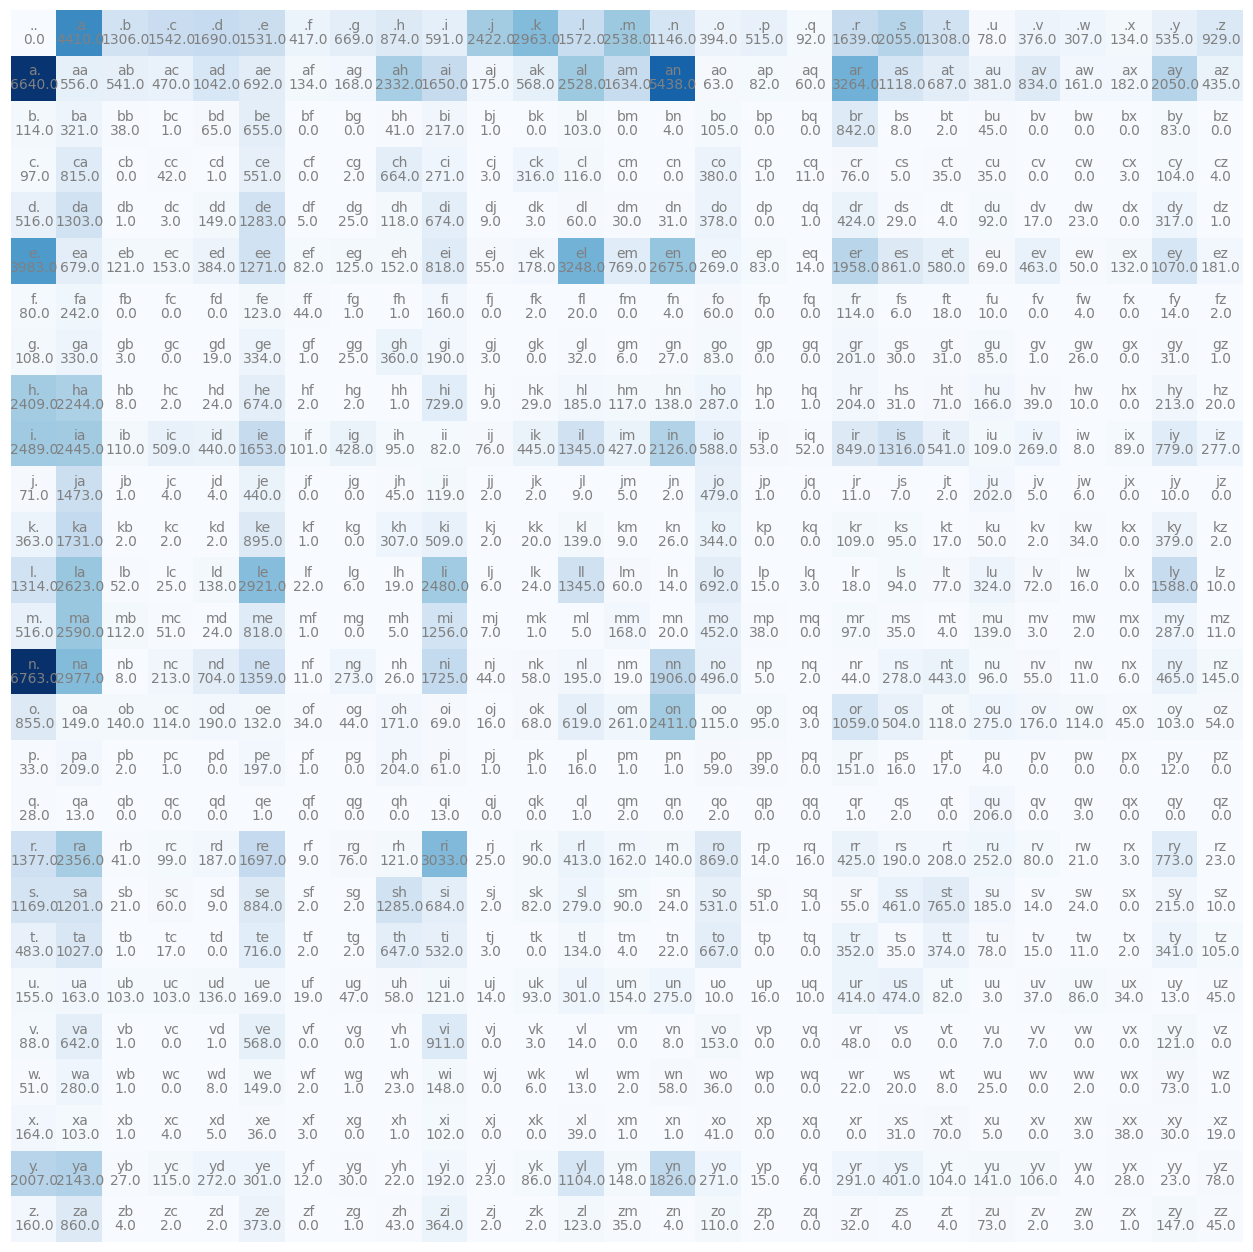

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [ ]:
P = (N + 1).float()
P /= P.sum(1, keepdims=True)
P


In [51]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
